In [1]:
from nn.neural_network import NeuralNetwork
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from nn.layers import Input, Convolutional, Dense, Reshape

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
def preprocess_data(x, y, limit):
    indexes = []
    n = 2
    for i in range(n):
        indexes.append(np.where(y == i)[0][:limit])

    all_indices = np.hstack(indexes)
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), n, 1)
    return x, y


In [3]:
# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

In [4]:
model = NeuralNetwork(loss_f='MSE')

model.add_layer(Input(input_shape=x_train.shape[1:]))
model.add_layer(Convolutional(kernel_size=3, depth=1, act_f='sigmoid'))
model.add_layer(Convolutional(kernel_size=3, depth=3, act_f='sigmoid'))
model.add_layer(Reshape())
model.add_layer(Dense(n_neur=20, act_f='sigmoid'))
model.add_layer(Dense(n_neur=15, act_f='sigmoid'))
model.add_layer(Dense(n_neur=2, act_f='sigmoid'))

model.summary()

,Type,Activation Function,Input Shape,Output Shape
0,Input,None,None,"(1, 28, 28)"
1,Convolutional,Sigmoid,"(1, 28, 28)","(1, 26, 26)"
2,Convolutional,Sigmoid,"(1, 26, 26)","(3, 24, 24)"
3,Reshape,None,"(3, 24, 24)","(1728, 1)"
4,Dense,Sigmoid,"(1728, 1)","(20, 1)"
5,Dense,Sigmoid,"(20, 1)","(15, 1)"
6,Dense,Sigmoid,"(15, 1)","(2, 1)"


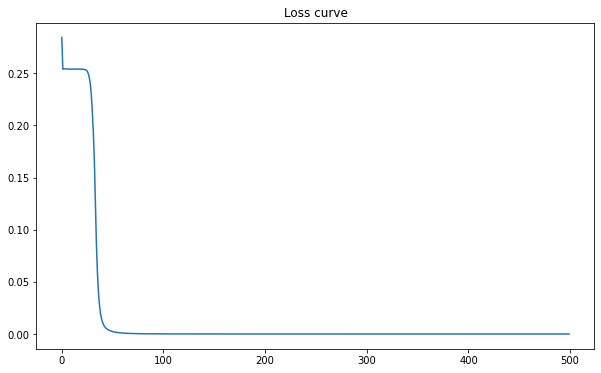

In [5]:
loss = model.fit(x_train, y_train, epochs=500, lr=0.01)
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(loss))), loss)
plt.title('Loss curve')
plt.show()

In [6]:
yp = model.predict(x_test)
count = 0
for i in range(len(yp)):
    pred = np.argmax(yp[i])
    true = np.argmax(y_test[i])
    if pred == true: count = count + 1

print(count / len(yp) * 100)

100.0


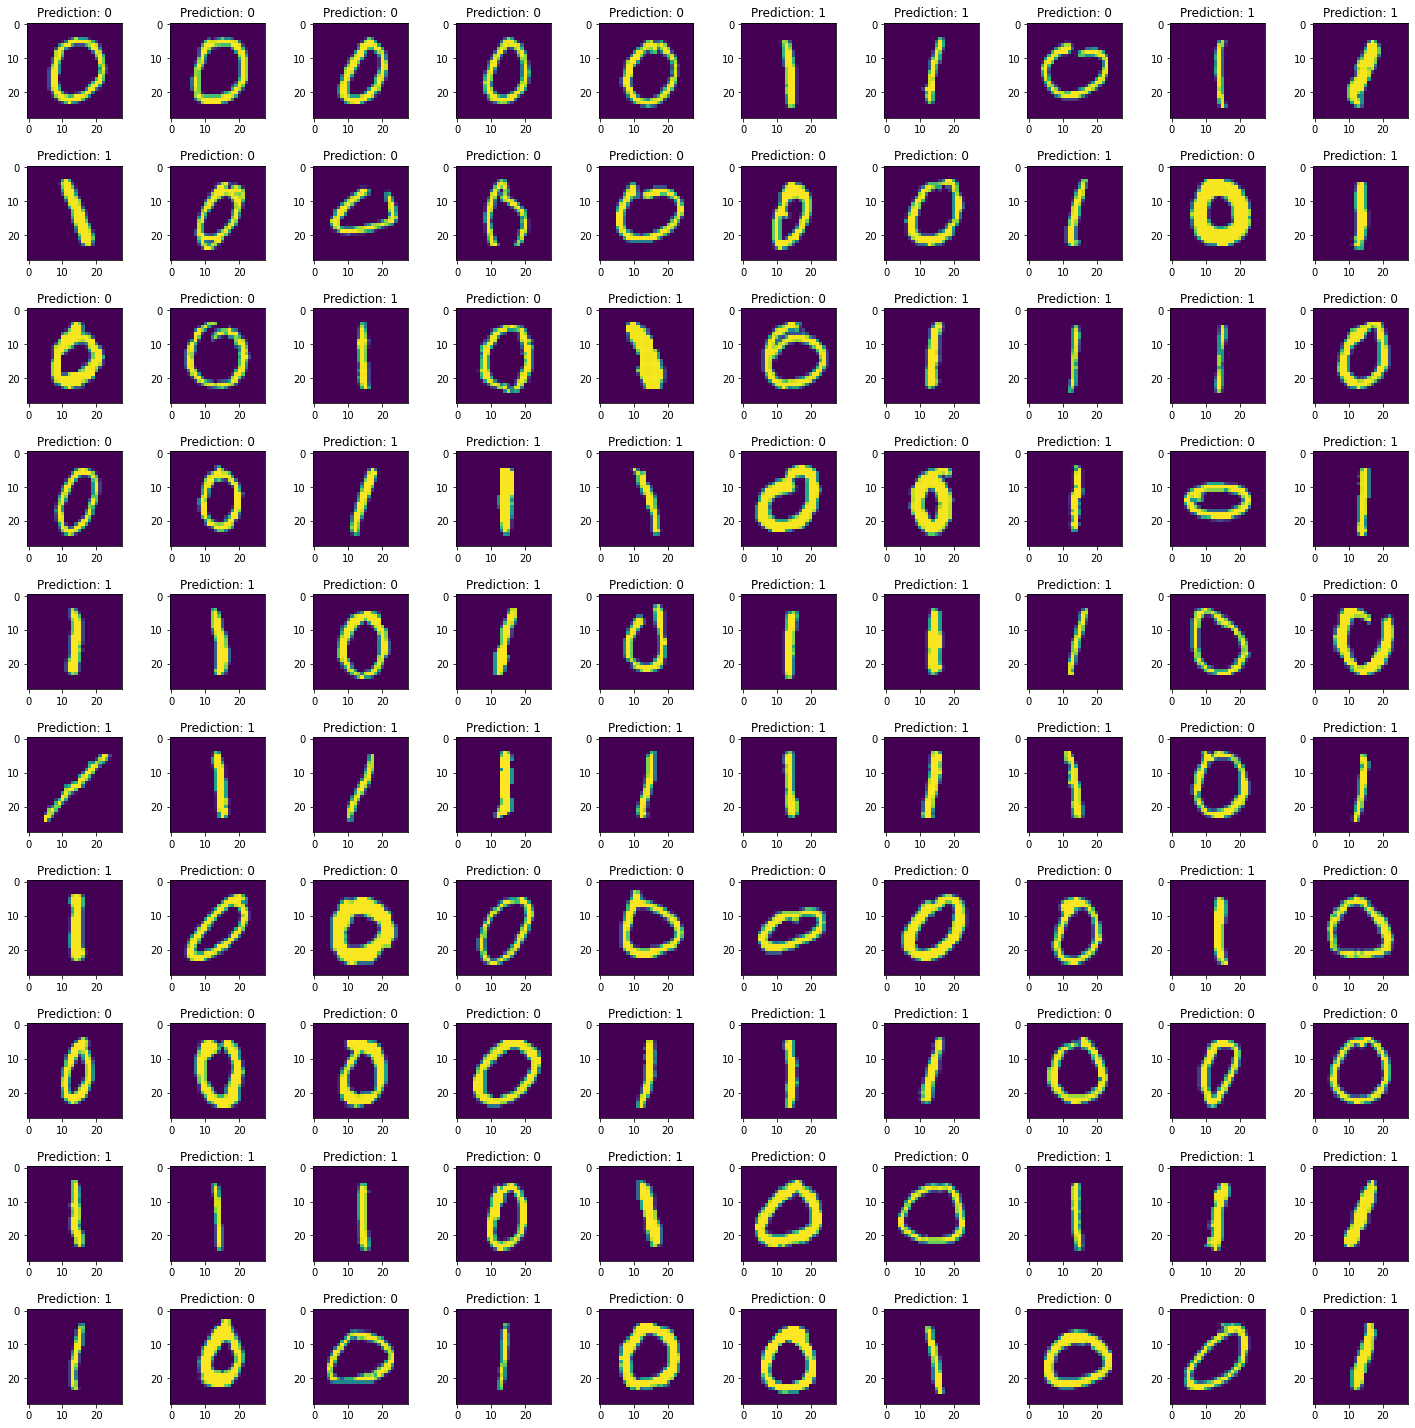

In [7]:
fig, axes = plt.subplots(10,10, figsize=(20,20))
fig.tight_layout()
for i,ax in enumerate(axes.flat):
    ax.imshow(x_test[i][0])
    ax.title.set_text(f'Prediction: {np.argmax(yp[i])}')